In [161]:
import requests as r

In [162]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)
resp.status_code

200

In [163]:
raw_data = resp.json()

In [164]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [165]:
final_data.insert(0, ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'])

In [166]:
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [167]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]

In [168]:
import datetime as dt
import csv

In [169]:
with open('brasil-covid.csv','w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [170]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

In [171]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label':labels[i],
                'data':y[i]
            })
        return datasets
    else:
        return [
            {
                'label':labels[0],
                'data':y
            }
        ]
    

In [172]:
def set_title(title = ''):
    if title != '':
        display = 'true'
    else:
        display ='false'
    return {
        'title' : title,
        'display' : display
    }
    

In [173]:
def create_chart(x, y, labels, kind = 'bar', title = ''):
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type':kind,
        'data': {
            'labels':x,
            'datasets':datasets
        },
        'options': options
    }
    
    return chart

In [174]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [175]:
 def save_image(path, content):
        with open(path, 'wb') as image:
            image.write(content)

In [176]:
from PIL import Image
from IPython.display import display

In [177]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

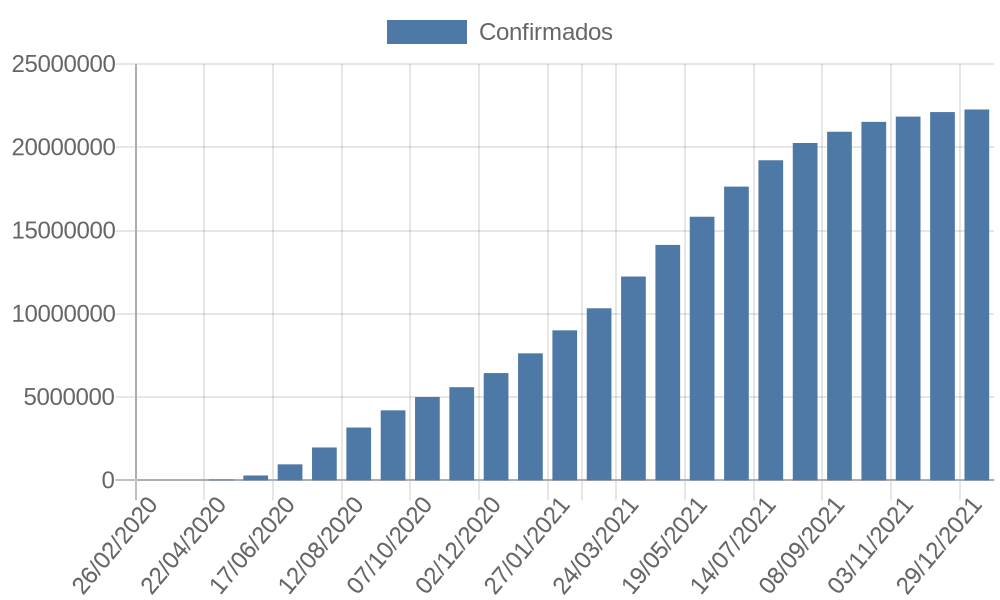

In [178]:
y_data_1 = []
for obs in final_data[1::28]:
    y_data_1.append(obs[CONFIRMADOS])
    

    
labels = ['Confirmados','Recuperados']

x = []
for obs in final_data[1::28]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1], labels, title = 'Gráfico confirmado')
chart_content = get_api_chart(chart)
save_image('grafico-covid-brasil.png', chart_content)
display_image('grafico-covid-brasil.png')